In [8]:
# importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install yellowbrick
from yellowbrick.target import FeatureCorrelation

!pip install wordcloud
from wordcloud import WordCloud


In [9]:
#importing data 
spotify = pd.read_csv('data.csv')
spotify_art = pd.read_csv('data_by_artist.csv')
spotify_gen = pd.read_csv('data_by_genres.csv')
spotify_year = pd.read_csv('data_by_year.csv')
spotify_w_genres = pd.read_csv('data_w_genres.csv')
spotify_top50 = pd.read_csv('Spotify_top_50_songs.csv')


In [10]:
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [4]:
spotify.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [5]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

## 1. DATA CLEANSING

###     Feature Selection/Changes



 
 *   **release_date/year:** The year feature is a derivative to the release_date feature, therefore one of them should be excluded. Since the pattern of the release_date is not uniform throughout, release_date will be dropped.
 
 
 
 * **duration_ms:** Since duration in seconds add ups to a long list of numbers, for the convenience seconds are changed to minutes.


In [11]:
columns = ['id','name','artists','release_date','year']
for col in columns:
    print (f'{col:<15}: {spotify[col].nunique()} unique values')

id             : 172230 unique values
name           : 137013 unique values
artists        : 36195 unique values
release_date   : 11043 unique values
year           : 102 unique values


In [12]:
#drop the feature relase_date from the Data Frame

spotify = spotify.drop( ['release_date'], axis =1)
spotify.shape

(174389, 18)

In [13]:
# convert the miliseconds to minutes

spotify['duration_min'] = spotify['duration_ms']/60000
spotify['duration_min'].describe()

count    174389.000000
mean          3.880167
std           2.473263
min           0.082283
25%           2.768883
50%           3.429783
75%           4.428667
max          88.971700
Name: duration_min, dtype: float64

## 2. EDA 

* ### Most popular Artists, Tracks and Genres.

 
#### <span style='background :yellow' > Top 10 Recent Popular songs </span>


In [5]:
top10 = spotify.sort_values(by=['popularity'],ascending=False)
top10[['artists','name','popularity','year']].head(10)

,artists,name,popularity,year
20062,['Olivia Rodrigo'],drivers license,100,2021
19862,"['24kGoldn', 'iann dior']",Mood (feat. iann dior),96,2020
19866,['Ariana Grande'],positions,96,2020
19886,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95,2020
19976,['KAROL G'],BICHOTA,95,2020
19868,['Ariana Grande'],34+35,94,2020
19870,['CJ'],Whoopty,94,2020
19872,['The Kid LAROI'],WITHOUT YOU,94,2020
19876,['Billie Eilish'],Therefore I Am,94,2020
19928,"['Bad Bunny', 'ROSALÍA']",LA NOCHE DE ANOCHE,94,2020


#### <span>Looking at the recent data:  The most popular song is *Drivers License* by Olivia Rodrigo released in the year 2021. 
Followed by *Mood(ft. ian dior)* by 24kGoldn and ian dior release in the year 2020 at the second most popular. 
The third spot is caught by *Positions* by Ariana Grande released in the year 2020 </span>
---

#### <span style='background :yellow' > 20 Most popular artists through the years </span>

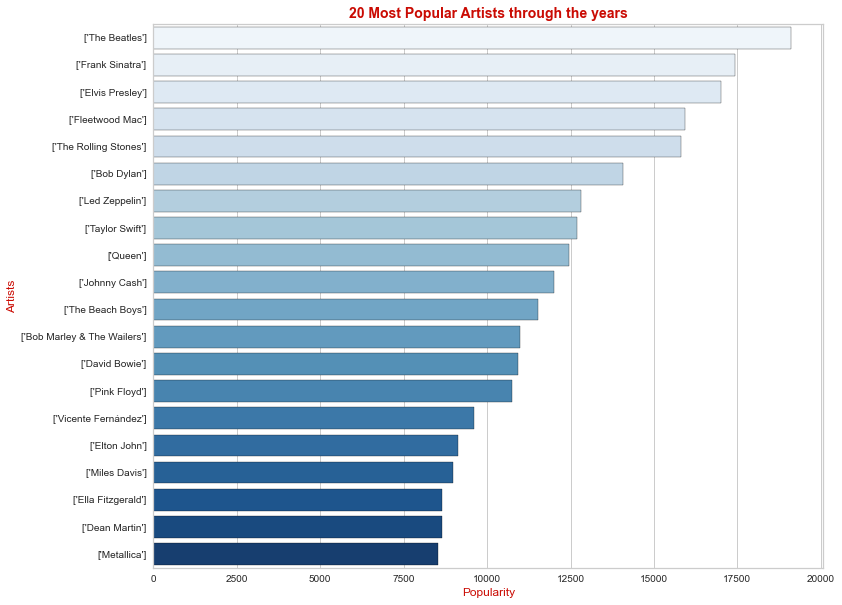

In [9]:


fig, ax = plt.subplots(figsize =(12,10))
popular_artists = spotify.groupby('artists')['popularity'].sum().sort_values(ascending = False).head(20)

ax = sns.barplot(x = popular_artists.values, y = popular_artists.index, palette = "Blues", orient ="h", edgecolor ='black', ax = ax)
ax.set_xlabel('Popularity', c ='r', fontsize = 12 )
ax.set_ylabel('Artists', c = 'r', fontsize = 12)
ax.set_title('20 Most Popular Artists through the years', c ='r',fontsize = 14, weight = 'bold')
plt.show()
                 


 #### <span style = "color: red;"> The Beatles </span>  tops the list of the 20 most popular artists through the years on SPOTIFY.
 ---

#### <span style='background :yellow' > Artists with the mosts content on spotify </span>

In [42]:
#Most count of artits on spotify from the Spotify_art Data source

most_cont = spotify_art.sort_values (by =['count'], ascending = False)
most_cont[['artists','count']].head(10)

,artists,count
9761,Francisco Canaro,3179
27354,Tadeusz Dolega Mostowicz,2562
32374,Эрнест Хемингуэй,2350
32373,Эрих Мария Ремарк,2124
9832,Frank Sinatra,1435
12375,Ignacio Corsini,1248
30780,Vladimir Horowitz,1202
2084,Arturo Toscanini,1156
31127,Wiener Philharmoniker,1117
3185,Billie Holiday,1086


#### There are some Artists on Spotify which has immense number of tracks under their name but not nesseceraily popular among the listeners. Such as Francisco Canaro has about 3179 tracks.
---

#### <span style='background :yellow' > 25 Most Popular Artists with >100 Tracks </span>

In [11]:
# 25 most popular artists with more than 100 tracks extracted from the most_cont Data Frame.

poparts_100 = most_cont[most_cont['count']>100]
poparts_100 = poparts_100.sort_values(by=['popularity'],ascending=False)
poparts_100[['artists','popularity']].head(25)


,artists,popularity
14690,Juice WRLD,74.897436
2423,BTS,70.811475
1924,Ariana Grande,70.420732
29954,Travis Scott,70.121622
16712,Lil Uzi Vert,68.210084
21254,One Direction,67.438202
29282,The Weeknd,65.348837
19913,Morgan Wallen,64.651429
23875,Rihanna,64.620690
5606,Coldplay,63.900000


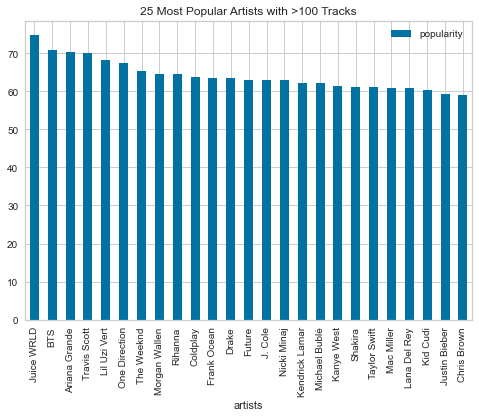

In [16]:
# barplot representing the 25 most popular artists with more than 100 tracks.

poparts_100[['artists','popularity']].head(25).plot.bar (x = 'artists', y= 'popularity')
plt.title("25 Most Popular Artists with >100 Tracks")
plt.show()





#### When compared among the Artists who has more than 100 tracks on Spotify, <span style="color:blue;"> Juice WRLD (74.89) </span> tops the list of most popular Artist  followed by <span style="color:purple;"> BTS (70.81)</span>  and <span style="color:red;"> Ariana Grande (70.42)</span>
---

#### <span style='background :yellow' > Top 50 Artist's Names 2020 </span>

In [21]:
spotify_top50.head()

,Song,Artists,Weeks at no 1,Average_Streams (Millions),Date_Published,Date_Achieved
0,WAP,Cardi B,1.0,40.3,7 August 2020,20 August 2020
1,Savage Love (Laxed – Siren Beat),Jawsh 685,2.0,32.2,11 June 2020,6 August 2020
2,Cardigan,Taylor Swift,1.0,35.7,24 July 2020,30 July 2020
3,Rockstar,DaBaby,7.0,37.4,24 April 2020,4 June 2020
4,Rain on Me,Lady Gaga,1.0,41.6,22 May 2020,28 May 2020


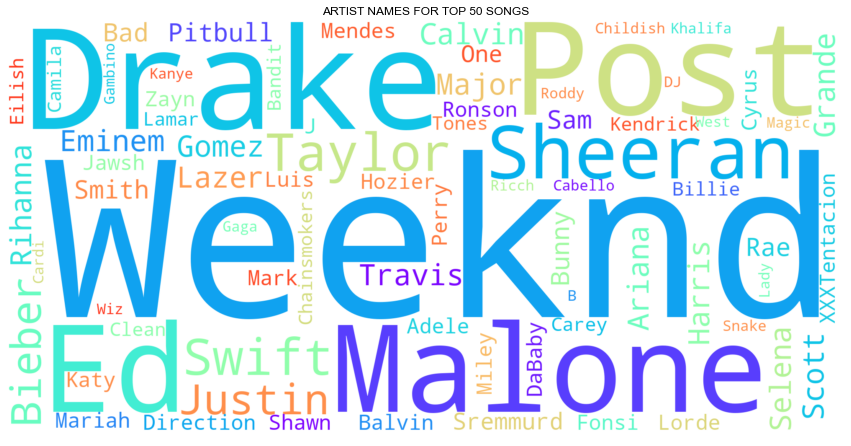

In [22]:
#Top 50 Artists names from the Spotify_top_50_songs Data source

plt.style.use('seaborn')

words1 = spotify_top50["Artists"].str.split("(").str[0] .value_counts().keys()

wordcloud1 = WordCloud(scale = 5, max_words = 1000, colormap = "rainbow", background_color ="white").generate(" ".join(words1))

plt.figure(figsize=(15,20))
plt.imshow(wordcloud1,interpolation = "bilinear")
plt.axis("off")
plt.title("ARTIST NAMES FOR TOP 50 SONGS", color = 'black')
plt.show()

  


#### <span style='background :yellow' > Top 10 Popular Genres </span>

In [17]:
#Top 10 popular Genres from the spotify_gen data source.

top10_genres = spotify_gen.sort_values(by = ['popularity'],ascending = False)
top10_genres[['genres', 'popularity']].head(10)


,genres,popularity
565,chinese electropop,79.000000
1768,korean mask singer,78.000000
3213,yaoi,77.000000
996,dutch rap pop,77.000000
2544,rochester mn indie,76.000000
945,dong-yo,76.000000
44,afroswing,75.333333
1616,j-rap,75.000000
1066,estonian pop,75.000000
1539,irish pop,74.625000


#### The top Genre in terms of popularity is CHINESE ELECTROPOP followed closely by the KOREAN MASK SINGER and YAOI
---

#### <span style = 'Background : yellow'> Number of song release from 1920-2021 </span>

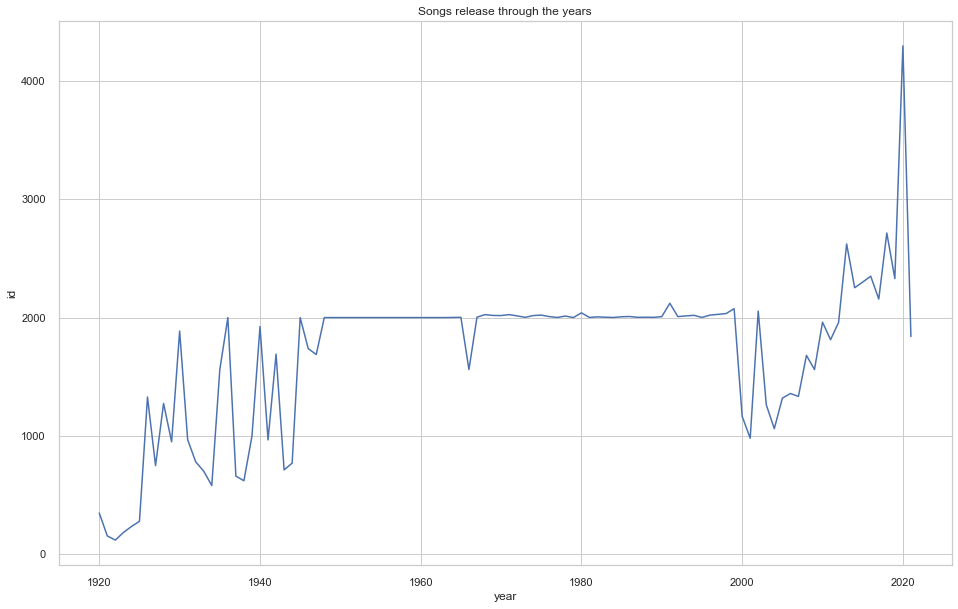

In [21]:
plt.figure(figsize = (16,10))
sns.set(style = "whitegrid")
x = spotify.groupby("year")["id"].count()
axis = sns.lineplot(x= x.index, y =x)
ax.set_xlabel('Year')
ax.set_ylabel('Count')
plt.title("Songs release through the years")
plt.show()

#### Looking at the music release through the years, from <span style="color:pink;">1920</span> there were few ups and downs till the <span style= "color:blue;">1950s </span>, from where the release of songs were quite constant of about the count of 2000 tracks. However, there is a sudden downfall in the count around the <span style= "color:orange;"> early 2000</span> but quickly rose up to the initial count to fall back again. From then on, the count gradually kept on rising hitting above the mark of 4000 in <span style="color: purple;"> 2020</span>.
---

#### <span style= 'background: yellow'> Let's see how many years will it take on continuous listening of all tracks available </span>

In [15]:
spotify.duration_min.sum()/(60*24*365)

1.2874019747272956

#### <span style = 'background: yellow'> Audio Characteristics over the years </span>

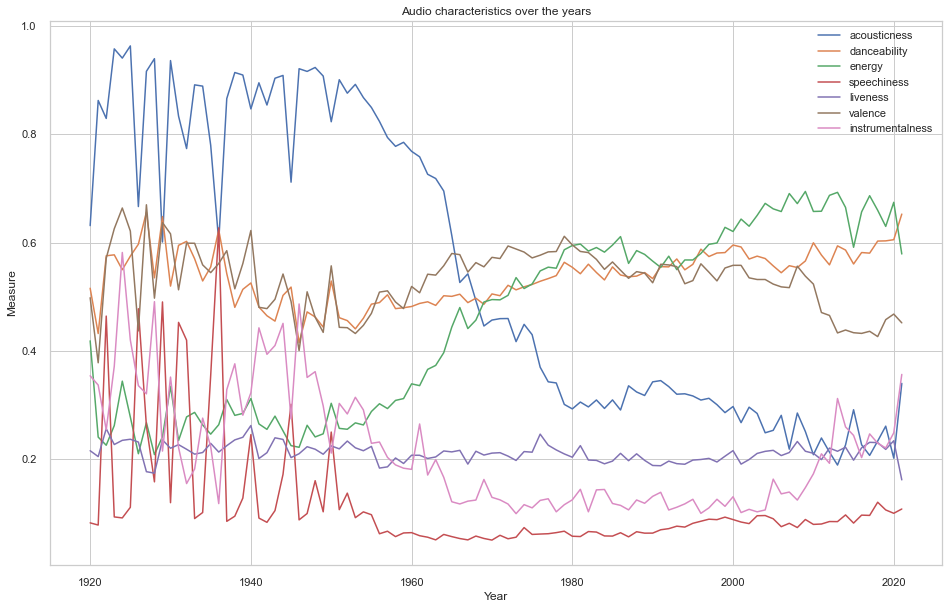

In [37]:
#features like Loudness and Tempo aren't included in this chart due to their huge variation in range.

plt.figure(figsize=(16,10))
sns.set(style = "whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence","instrumentalness"]
for col in columns:
    x= spotify.groupby ("year")[col].mean()
    ax= sns.lineplot(x=x.index, y = x, label = col)
ax.set_title('Audio characteristics over the years')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
plt.show()


#### Through the years from 1920s, there is a clear change in the pattern of audio characteristics of tracks. 
* Tracks have become a lot more energetic in recent years with the highest measure of about 0.7 and so is the Danceability,
* While the acousticness dropped from the highest measure of almost 1 to the lowest of below 0.2. 
* Liveness has somewhat remain constant throughout the years and so is the speechiness from the late 1950s.
* level of Instrumentalness decreased a bit from 1960s but it has been steadily increasing from the early 2000.
---

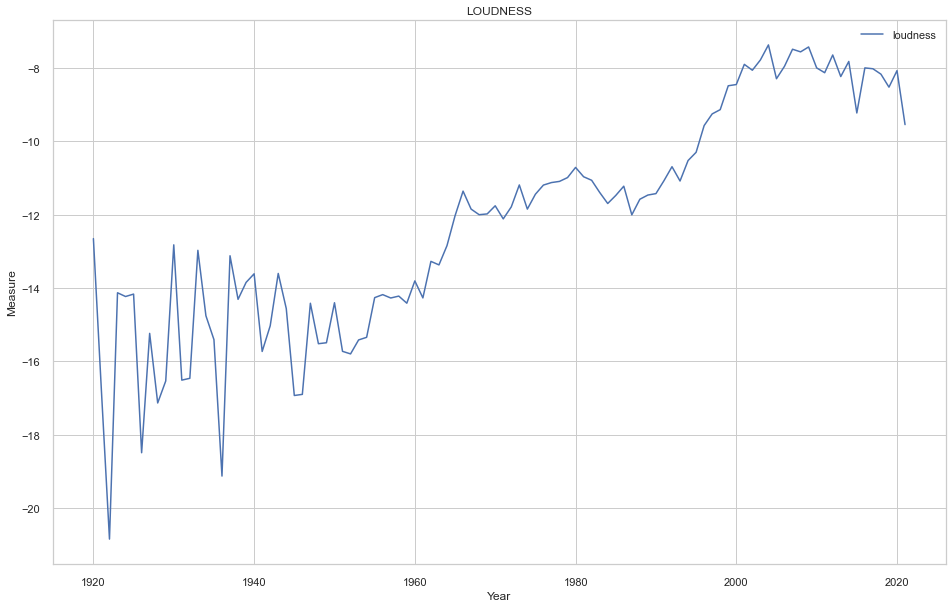

In [35]:
plt.figure(figsize= (16,10))
sns.set(style = "whitegrid")
columns = ["loudness"]
for col in columns:
    x = spotify.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('LOUDNESS')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
plt.show()

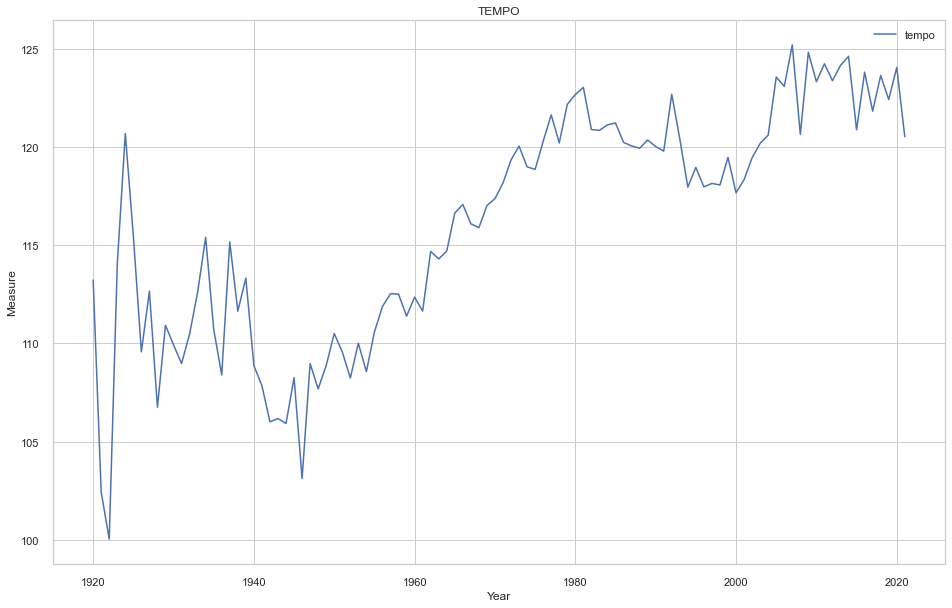

In [36]:
plt.figure(figsize= (16,10))
sns.set(style = "whitegrid")
columns = ["tempo"]
for col in columns:
    x = spotify.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('TEMPO')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
plt.show()

* Audio characteristics such as **Loudness and Tempo** has also increased through the years.

---

#### <span style ='background: yellow'> Correlation between audio characteristic features </span>

<AxesSubplot:>

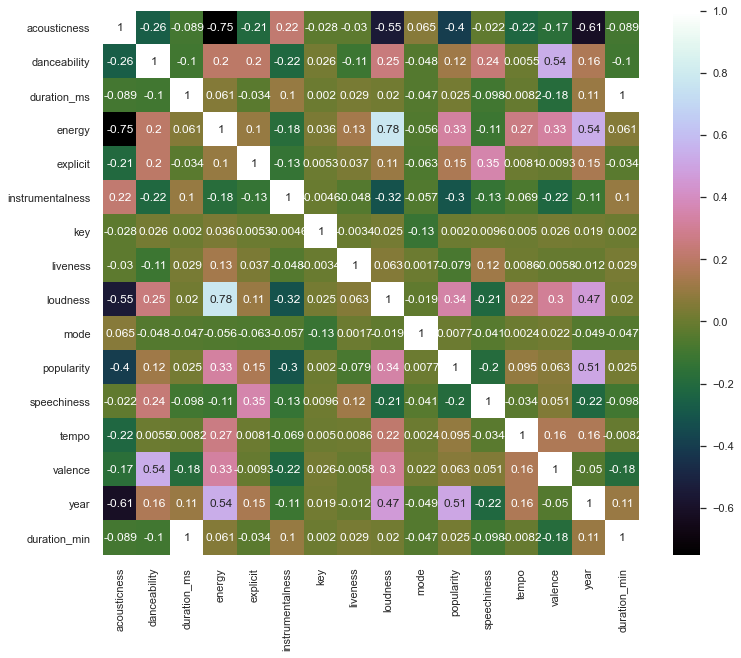

In [29]:
plt.figure(figsize = (12,10))
sns.set(style = "whitegrid")
corr = spotify.corr()
sns.heatmap(corr, annot = True, cmap = "cubehelix")

<span style='background:yellow'>**Lets perform a feature correlation between "Popularity" and other few audio characteristics features.**</span>

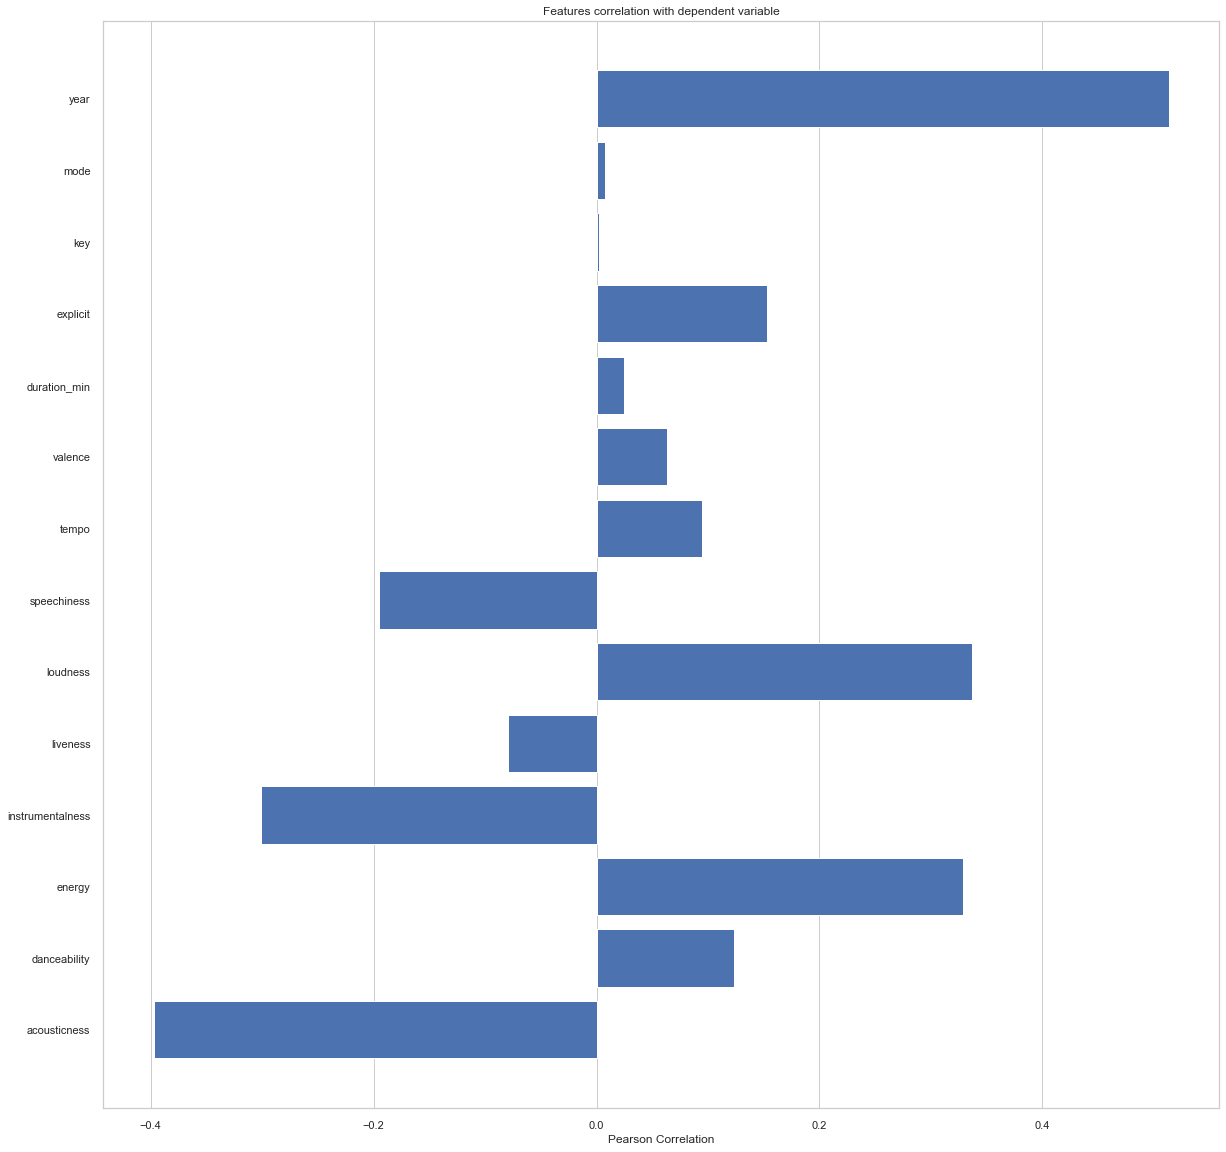

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [27]:
feature_names = ['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','duration_min','explicit','key','mode','year']

x, y = spotify[feature_names], spotify['popularity']

#pass feature names into a list

features = np.array(feature_names)

#instantiate the visualizer 

visualizer = FeatureCorrelation(labels = features)

plt.rcParams['figure.figsize'] = (20,20)
visualizer.fit(x,y)

visualizer.show()

**So, there's 10 features with +ve correlation and 4 with -ve correlation.**

---

In [173]:
# correlation with popularity

correlation = spotify.drop(columns =['duration_ms','popular_artist']).corr()
(correlation['popularity']).sort_values(ascending = False)


popularity          1.000000
year                0.513227
loudness            0.337194
energy              0.328939
explicit            0.152545
danceability        0.123746
tempo               0.094985
valence             0.063471
duration_min        0.024717
mode                0.007652
key                 0.001951
liveness           -0.078959
speechiness        -0.195329
instrumentalness   -0.300625
acousticness       -0.396744
Name: popularity, dtype: float64

 #### <span style = 'background:yellow'> Probabilty of a track getting a score of 50 on popularity ratings. </span>

In [28]:
total = spotify.shape[0]
popularity_score_more_than_50 = spotify[spotify['popularity'] > 50].shape[0]

probability = (popularity_score_more_than_50/total)* 100
print("Probability of a song getting more than 50 in Popularity :", probability)

Probability of a song getting more than 50 in Popularity : 15.425284851682159


**The popularity score of a song ranges from 0 to 100 and the probability of a song getting more than 50 is just 15.4. It seems like a song getting popular is a bit tough in general.**

---


In [167]:
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,mode,name,popularity,speechiness,tempo,valence,year,duration_min,pop_artists,popular_artist
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,...,0,Keep A Song In Your Soul,12,0.0936,149.976,0.6340,1920,2.805550,False,False
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,...,0,I Put A Spell On You,7,0.0534,86.889,0.9500,1920,2.503333,False,False
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,...,1,Golfing Papa,4,0.1740,97.600,0.6890,1920,2.730450,False,False
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,...,1,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422,1920,7.034783,False,False
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,...,0,Xuniverxe,2,0.0768,122.076,0.2990,1920,2.753733,False,False


---

 ## <span style='background: yellow'> Audio characteristics Analysis </span>

### Acousticness 
> Majority of the tracks' acousticness is either close to 0 or 1.

> More the acousticness of a track, less is its mean popularity.

>Acousticness is negatively correlated with the correlation value of -0.39

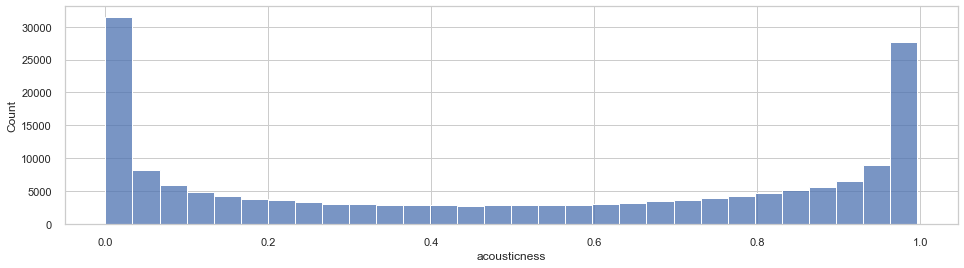

In [52]:
fig, ax = plt.subplots(figsize=(16,4))
sns.histplot(spotify['acousticness'], kde=False, bins = 30)
plt.show()

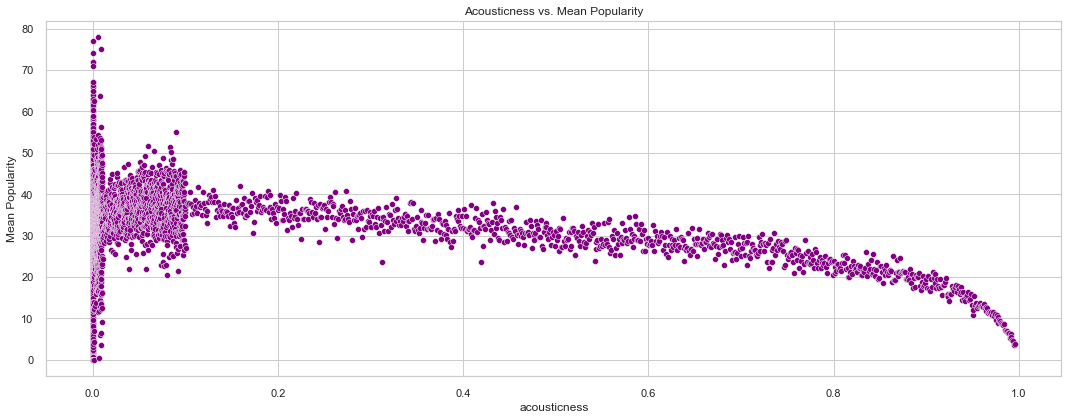

In [57]:

fig, ax = plt.subplots(figsize = (15,6))

ax_data = spotify.groupby('acousticness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax_data['acousticness'], y= ax_data['popularity'], data= spotify, color= 'purple', ax=ax)
ax.set_title('Acousticness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize = 12)
plt.tight_layout()
plt.show()
    
    

---

### Danceability
> It seems to have a normal distribution between the measures of 0 and 1.

> The majority of Danceability values are between 0.2-0.8 with the mean value of 0.53

> Danceability is linearly correlated with the popularity with the value of 0.12

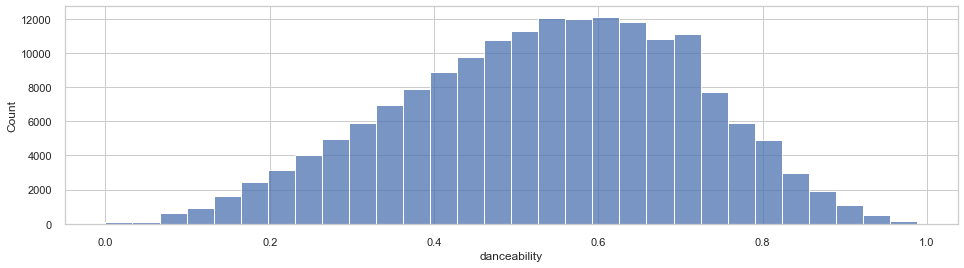

In [53]:
fig, ax = plt.subplots(figsize=(16,4))
sns.histplot(spotify['danceability'], kde=False, bins = 30)
plt.show()

In [54]:
spotify['danceability'].describe()

count    174389.000000
mean          0.536758
std           0.176025
min           0.000000
25%           0.414000
50%           0.548000
75%           0.669000
max           0.988000
Name: danceability, dtype: float64

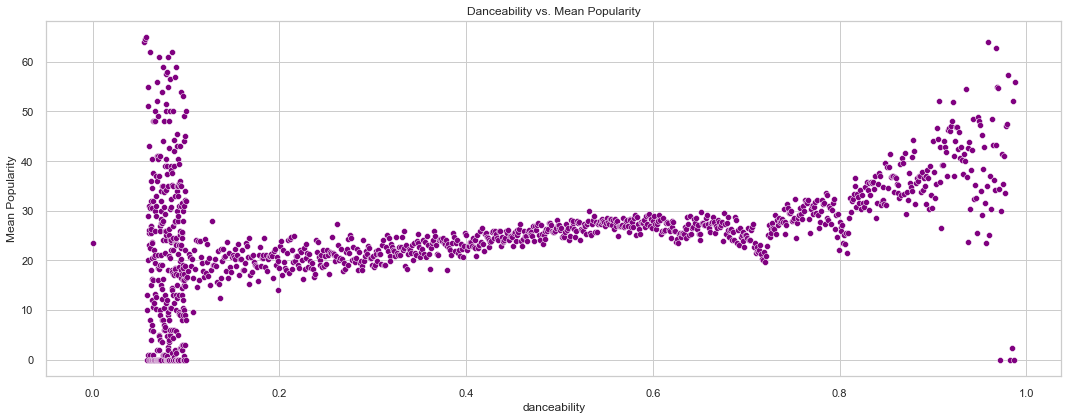

In [58]:
fig, ax = plt.subplots(figsize = (15,6))

ax_data = spotify.groupby('danceability')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax_data['danceability'], y= ax_data['popularity'], data= spotify, color= 'purple', ax=ax)
ax.set_title('Danceability vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize = 12)
plt.tight_layout()
plt.show()
    

---

### Duration_min
> Duration of the tracks has been previously converted from miliseconds to minutes for more intuituve purpose.

> The mean duration of a track is 3.88 min.
> However, some tracks are long of about 88.9 min and some as short as 0.08 sec.

> It has positive correlation with the popularity but the value is low of 0.02


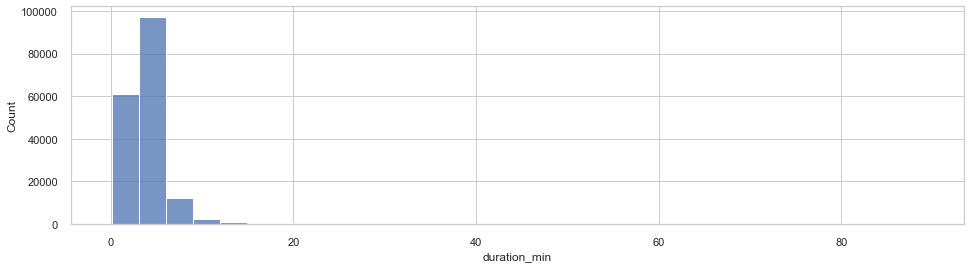

In [57]:
fig, ax = plt.subplots(figsize=(16,4))
sns.histplot(spotify['duration_min'], kde=False, bins = 30)
plt.show()

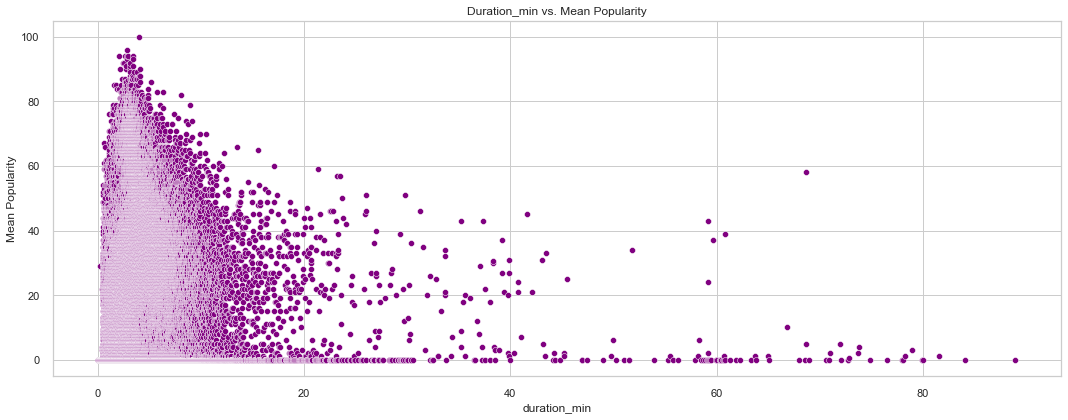

In [59]:
fig, ax = plt.subplots(figsize = (15,6))

ax_data = spotify.groupby('duration_min')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax_data['duration_min'], y= ax_data['popularity'], data= spotify, color= 'purple', ax=ax)
ax.set_title('Duration_min vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize = 12)
plt.tight_layout()
plt.show()

---

### Energy
> It measures the intensity of a track, energetic tracks feel faster, louder and has more noise content.

> The data is more uniformly distributed.

>It has positive correlation with the popularity of value 0.32



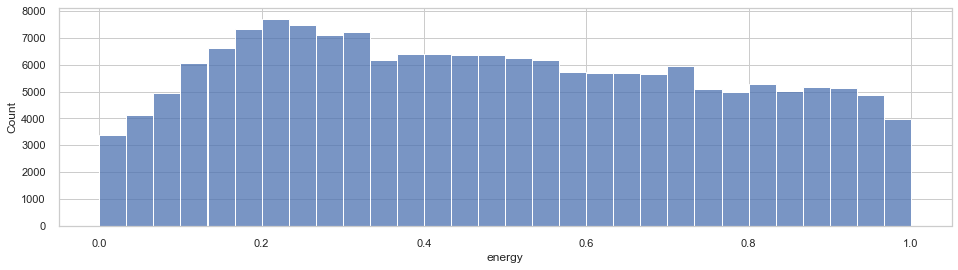

In [58]:
fig, ax= plt.subplots(figsize= (16,4))

sns.histplot(spotify['energy'],kde= False, bins=30)
plt.show()

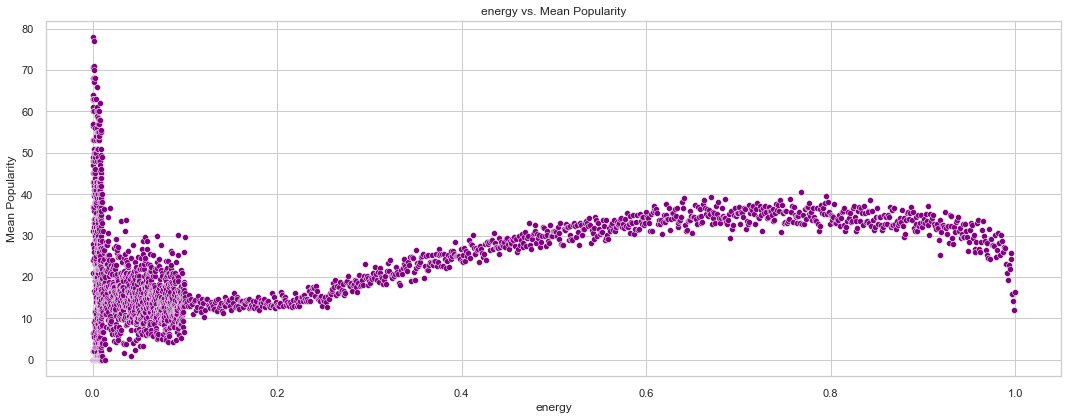

In [60]:
fig, ax = plt.subplots(figsize = (15,6))

ax_data = spotify.groupby('energy')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax_data['energy'], y= ax_data['popularity'], data= spotify, color= 'purple', ax=ax)
ax.set_title('energy vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize = 12)
plt.tight_layout()
plt.show()

---

### Instrumentalness
> The closer is the value of instrumentalness to the 1,the more likelihood of that track to have no vocals.

>Most of the data is on both sides of scope(but more on the lower measure).

>It is negativley correlated with popularity with the value of -0.30. Higher the level of Instumentalness, lesser is the value of mean popularity.


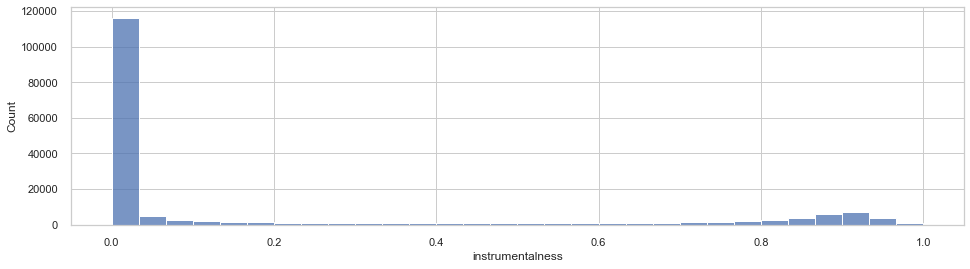

In [60]:
fig, ax = plt.subplots(figsize=(16,4))

sns.histplot(spotify['instrumentalness'],kde= False, bins=30)
plt.show()

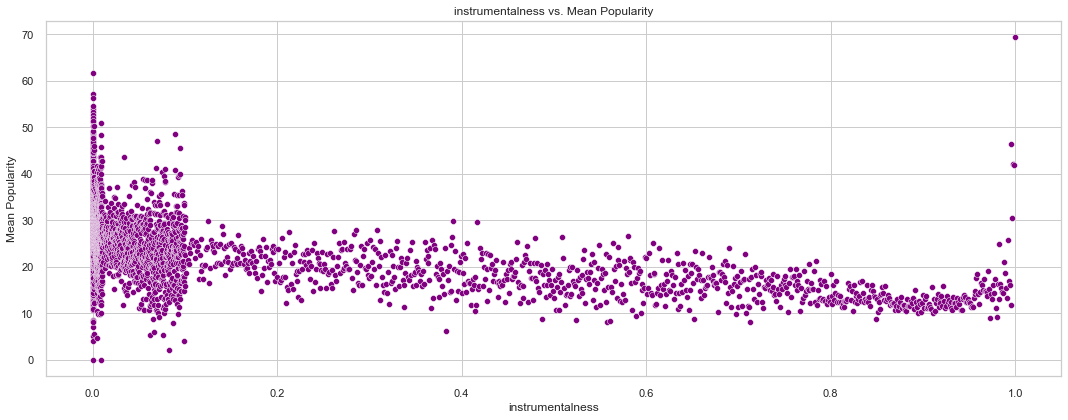

In [61]:
fig, ax = plt.subplots(figsize = (15,6))

ax_data = spotify.groupby('instrumentalness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax_data['instrumentalness'], y= ax_data['popularity'], data= spotify, color= 'purple', ax=ax)
ax.set_title('instrumentalness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize = 12)
plt.tight_layout()
plt.show()

---

### Liveness
> It detects the presence of the noises of audience. High measures of liveness suggests that the track is most probably performed live.

>Majority of the data is toward the lower level of measure, meaning they are all studio version of track.

>Liveness is negatively correlated to the popularity with the value of -0.07

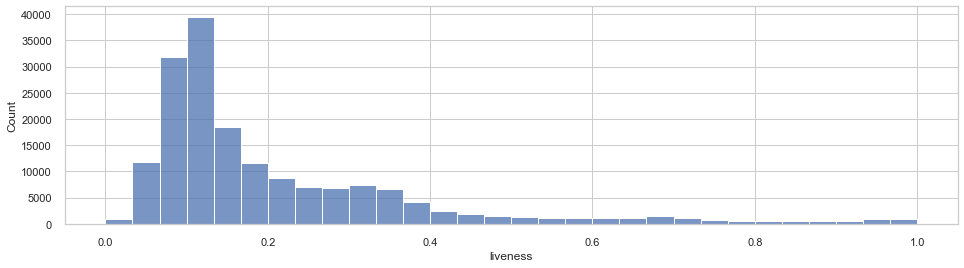

In [61]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(spotify['liveness'], kde = False, bins=30)
plt.show()

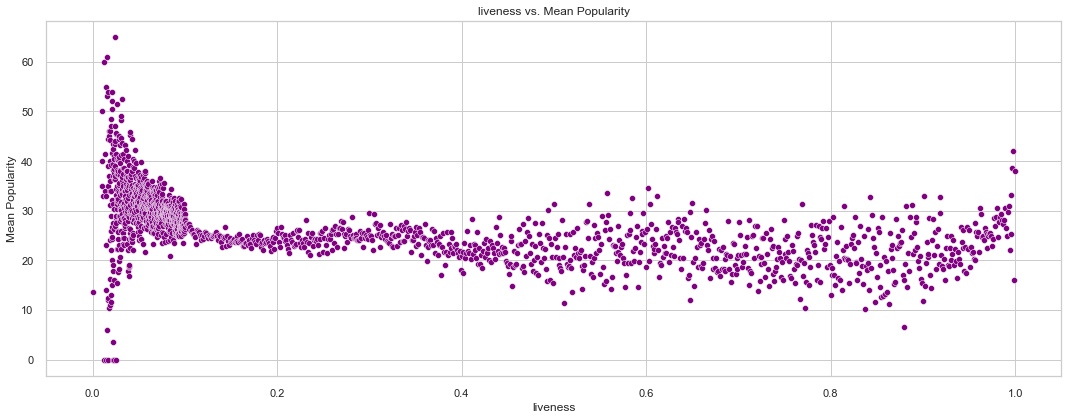

In [62]:
fig, ax = plt.subplots(figsize = (15,6))

ax_data = spotify.groupby('liveness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax_data['liveness'], y= ax_data['popularity'], data= spotify, color= 'purple', ax=ax)
ax.set_title('liveness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize = 12)
plt.tight_layout()
plt.show()

---

### Loudness
> As the name suggest, it measure how loud is the original track.

> The range of the measure for the loudness is not in binary and the distribution is negatively skewed.

> It is linearly Correlated with the popularity (0.33), louder is the track, more popular it is.

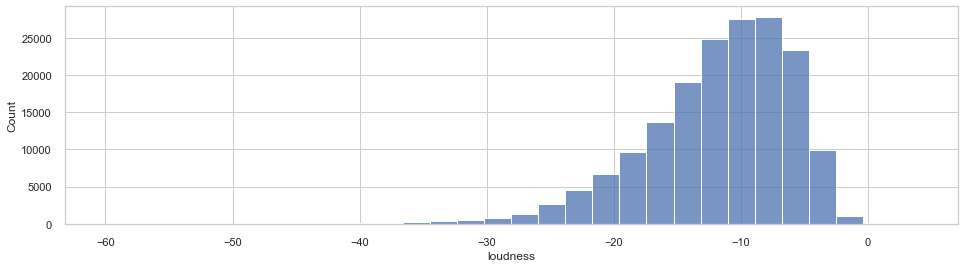

In [62]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(spotify['loudness'], kde = False, bins=30)
plt.show()

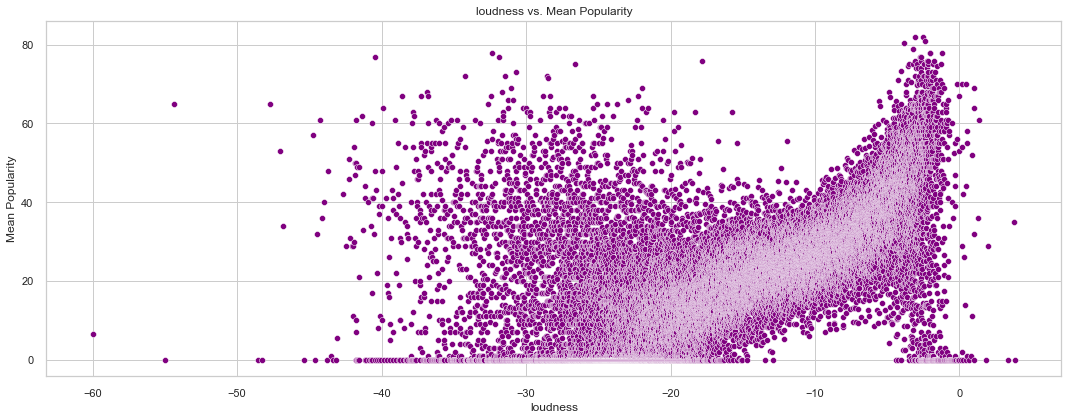

In [63]:
fig, ax = plt.subplots(figsize = (15,6))

ax_data = spotify.groupby('loudness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax_data['loudness'], y= ax_data['popularity'], data= spotify, color= 'purple', ax=ax)
ax.set_title('loudness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize = 12)
plt.tight_layout()
plt.show()

---

### Speechiness
> Closer the value is towards the 1, more likely is the track with less instrumental and more words spoken.

>Majority of the data is distributed towards the lower values of the measure.

>It is negatively correlated with the popularity(-0.19)

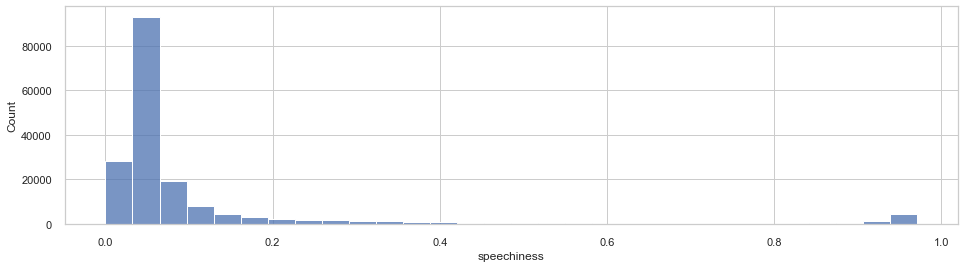

In [63]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(spotify['speechiness'], kde = False, bins=30)
plt.show()

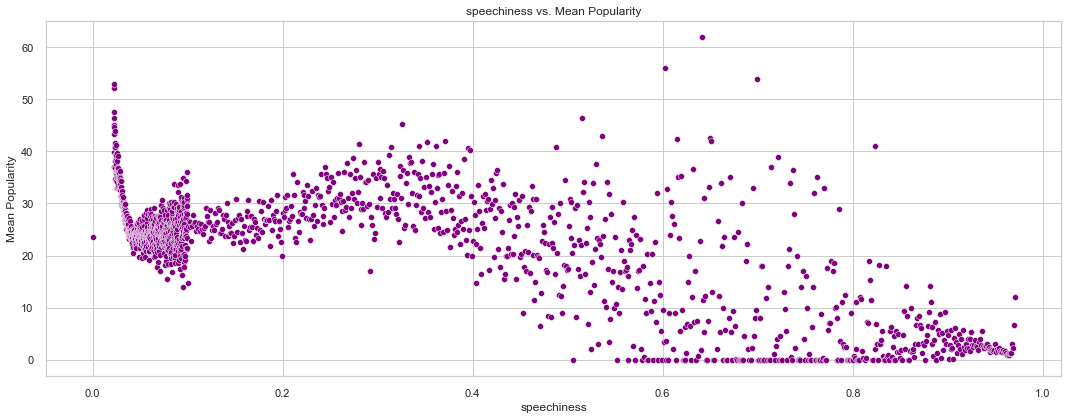

In [64]:
fig, ax = plt.subplots(figsize = (15,6))

ax_data = spotify.groupby('speechiness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax_data['speechiness'], y= ax_data['popularity'], data= spotify, color= 'purple', ax=ax)
ax.set_title('speechiness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize = 12)
plt.tight_layout()
plt.show()

---

### Tempo
>There are 1783 values of 0(outliers).

>It is positively correlated with the popularity but not so high (0.09)

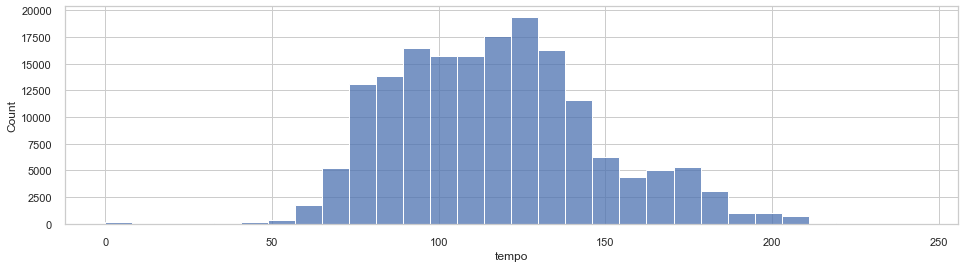

In [64]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(spotify['tempo'], kde = False, bins=30)
plt.show()

### Lets find out how many outliers are there.

In [68]:
Q1 = spotify[['tempo']].quantile(0.25) #25th percentile
Q3 = spotify[['tempo']].quantile(0.75) #75th percentile
IQR = (Q3-Q1)
print (IQR)

tempo    41.08
dtype: float64


In [82]:
lower_limit = Q1-1.5 *IQR
upper_limit = Q3+1.5 *IQR

#outliers when removed from the dataframe
no_outliers = spotify[~((spotify[['tempo']] <lower_limit)|(spotify[['tempo']]> upper_limit)).any(axis=1)]

# Count of Outliers = (Original dataframe - Outliers removed dataframe)
print(len(spotify[['tempo']]))  #original dataframe 
print(len(no_outliers))        #When outliers removed
print((174389)-(172606))      #Count of Outliers

174389
172606
1783


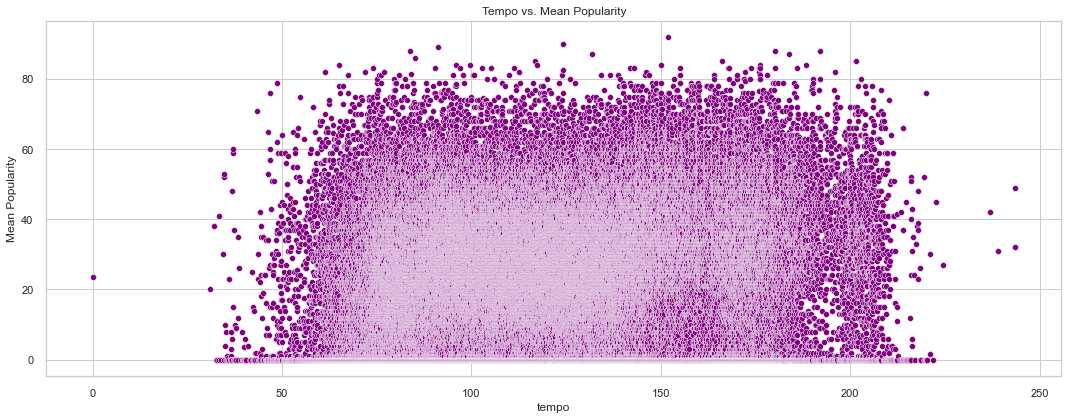

In [65]:
fig, ax = plt.subplots(figsize = (15,6))

ax_data = spotify.groupby('tempo')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax_data['tempo'], y= ax_data['popularity'], data= spotify, color= 'purple', ax=ax)
ax.set_title('Tempo vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize = 12)
plt.tight_layout()
plt.show()

---

### Valence
> This measure describes how much a positivity a track could give.

> The data is almost uniformly distributed.

> It is positively correlated with popularity but not so high (0.06)

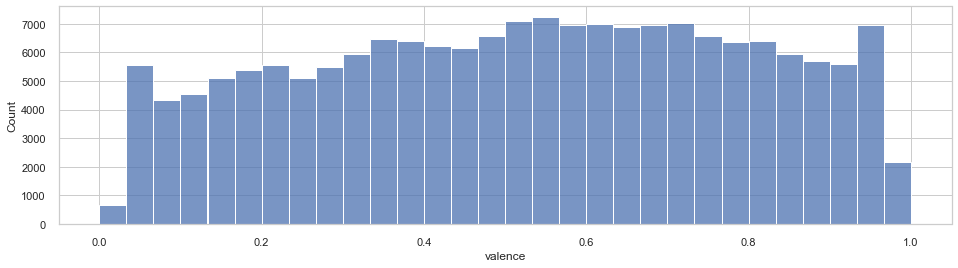

In [65]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(spotify['valence'], kde = False, bins=30)
plt.show()

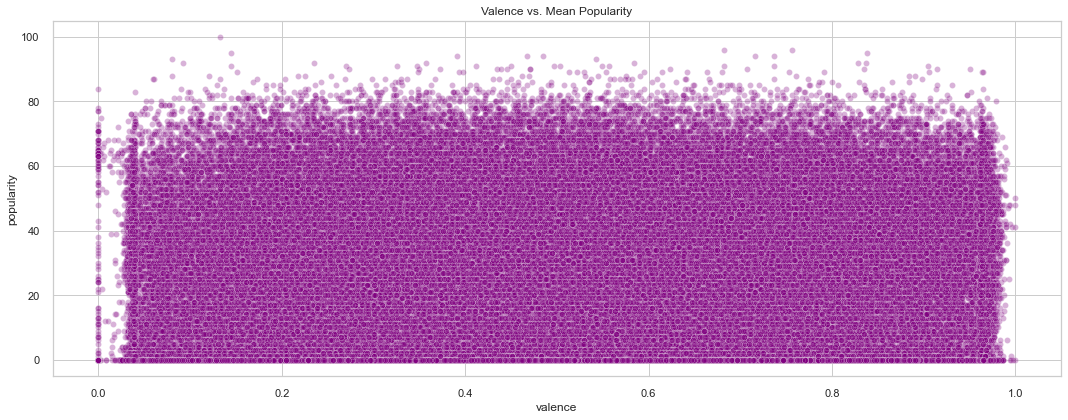

In [66]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.scatterplot(x='valence', y='popularity', data=spotify, color='purple', alpha=0.3)
plt.title('Valence vs. Mean Popularity')
plt.tight_layout()
plt.show()


---

### Year
> Each year has about different quantities of tracks added and most of the years have above 2000 tracks probably due to the 2000 maximal batch limit in the spotify's API.

>2020 has about the maximum release of tracks.

> Year is highly positively correlated to the popularity (0.51)

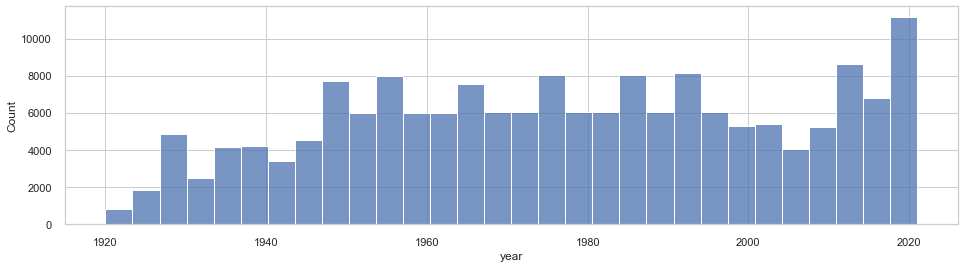

In [66]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(spotify['year'], kde = False, bins=30)
plt.show()

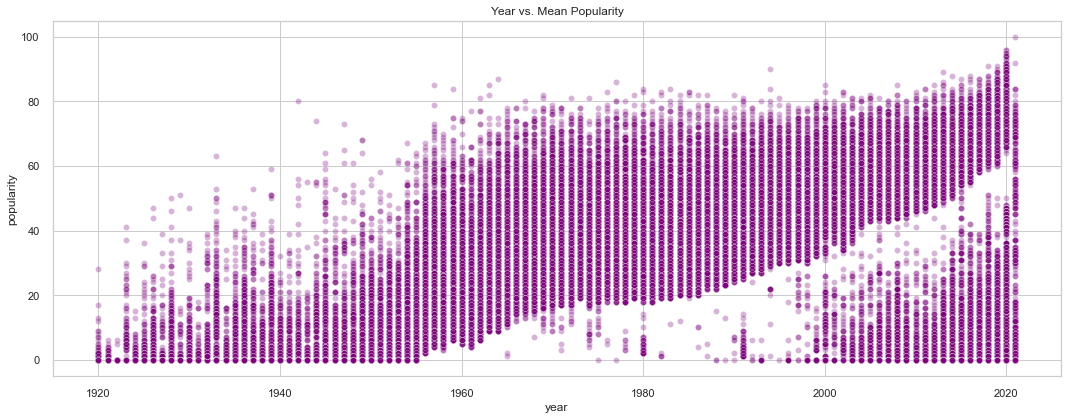

In [67]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.scatterplot(x='year', y='popularity', data=spotify, color='purple', alpha=0.3)
plt.title('Year vs. Mean Popularity')
plt.tight_layout()
plt.show()



#### * Among the Numeric Audio characteristics, Year (0.51) has the highest positive correlation with the Target (Popularity) followed by Loudness (0.33) and Energy(0.32). 
#### * Acousticness (-0.39) is the most negatively correlated to the Target followed by Instumentalness (-0.30) and Speechiness(-0.19).


***
---

<Table> <tr> <td bgcolor = skyblue> <Font size=5>  Insights </font> </td> </tr> </table>

#### The current top three songs are:
>
> 1. Drivers License by Olivia Rodrigo
> 2. Mood (ft.Iann dior) by 24kGoldn
> 3. Positions by Arian Grande

#### The current highest rated Artists are:
>
> 1. Juice WRLD
> 2. BTS
> 3. Arian Grande

* The **beatles** is the most popular artist throughout the years.



* There has been an immense increase in the addition of tracks over the years, reaching about 4000 in 2020.



* It would take 1.28 years on continuous listening of all tracks on Spotify.



* Tracks have become more **ENERGETIC** and **DANCEABLE** in the recent years. Also **LOUDNESS** and **TEMPO** has also increased. Meanwhile it has become less **ACOUSTIC**.



* **Energy** and **Loudness** are highly correlated, so is the **Valence** and **Danceability**.



* Chances of getting a song "Popular" is low of about 15.42%



* **Year**, **Loudness**, **Energy** are an important aspects to be taken into consideration for popularity of a song as these are positivley correlated to Popularity. And so are the **Acousticness**, **Instrumentalness**, **Speechiness** but these are negatively correlated to popularity.




